In [1]:
from grbalpha_tools.tools import Observation
import os
import pandas as pd
import numpy as np
from astropy.time import Time
import astropy.units as u
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

SF at 2023-11-20 03:10:03.440 in FoV: True


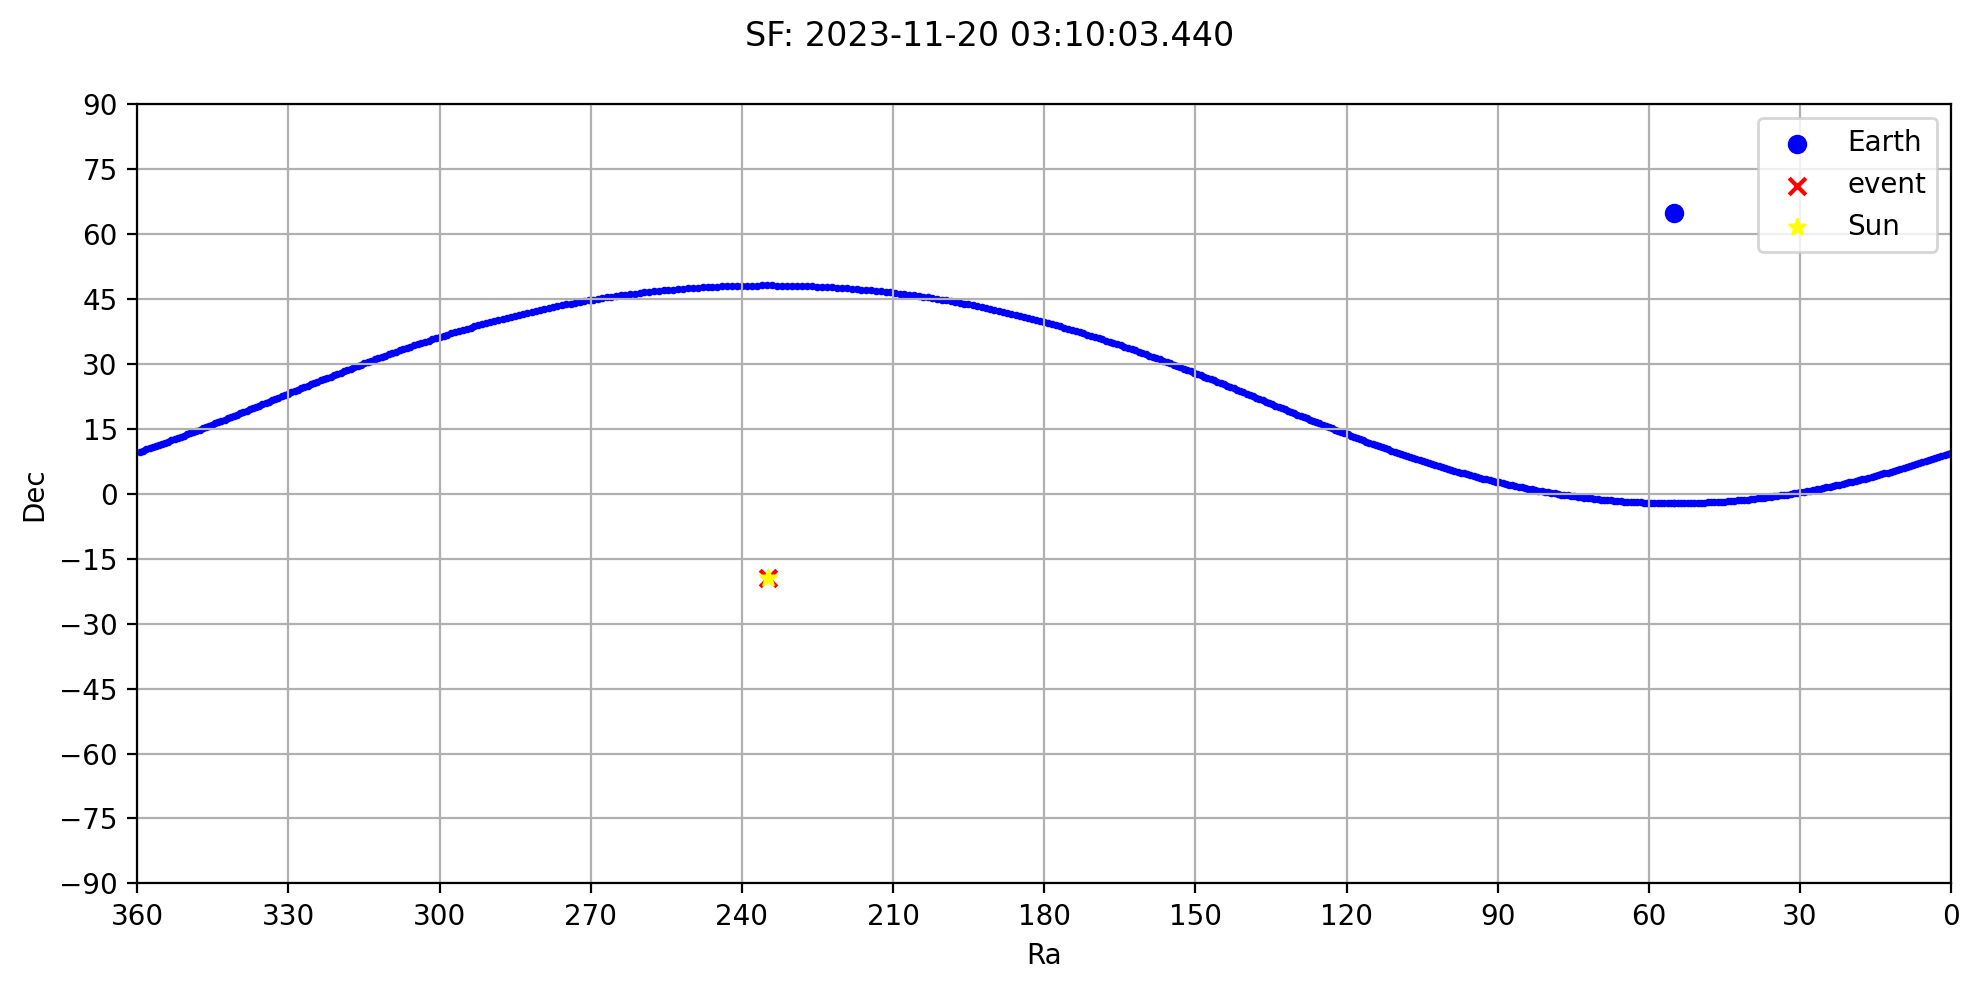

In [14]:
from grbalpha_tools.tools import Event

# time = '2023-11-20 00:23:08.750'
# typ = 'GRB'
# ra =  50.7
# dec = 1.4 
# Event(time,typ,ra,dec).in_fov(map=True)

time = '2023-11-20 03:10:03.440'
typ = 'SF'
Event(time,typ).in_fov(map=True)

trigger: vzlusat2_u1-SF_CALET at 2023-07-25 23:43:12.366:
energy band [ADC]: 0 - 256
energy band [keV]: 40 - 890
gain used for ADC - keV conversion [keV/ch]: 4.08
cutoff [ADC]: 48
fit function: linear

peak time [UTC]: 2023-07-25 23:44:06.500000
SNR at peak: 5.12
count rate [cnt/s] above background at peak: 78.156 +- 15.264

T90 start time [UTC]: 2023-07-25 23:43:23.500000
T90 end time [UTC]: 2023-07-25 23:44:32.500000
T90 duration [s]: 69.0
SNR in T90: 23.876
counts above background in T90: 2666.323 +- 111.674

trigger: vzlusat2_u1-SF_CALET at 2023-07-25 23:43:12.366:
energy band [ADC]: 0 - 128
energy band [keV]: 40 - 370
gain used for ADC - keV conversion [keV/ch]: 4.08
cutoff [ADC]: 48
fit function: linear

peak time [UTC]: 2023-07-25 23:44:06.500000
SNR at peak: 5.572
count rate [cnt/s] above background at peak: 82.078 +- 14.731

T90 start time [UTC]: 2023-07-25 23:43:22.500000
T90 end time [UTC]: 2023-07-25 23:44:35.500000
T90 duration [s]: 73.0
SNR in T90: 26.633
counts above bac

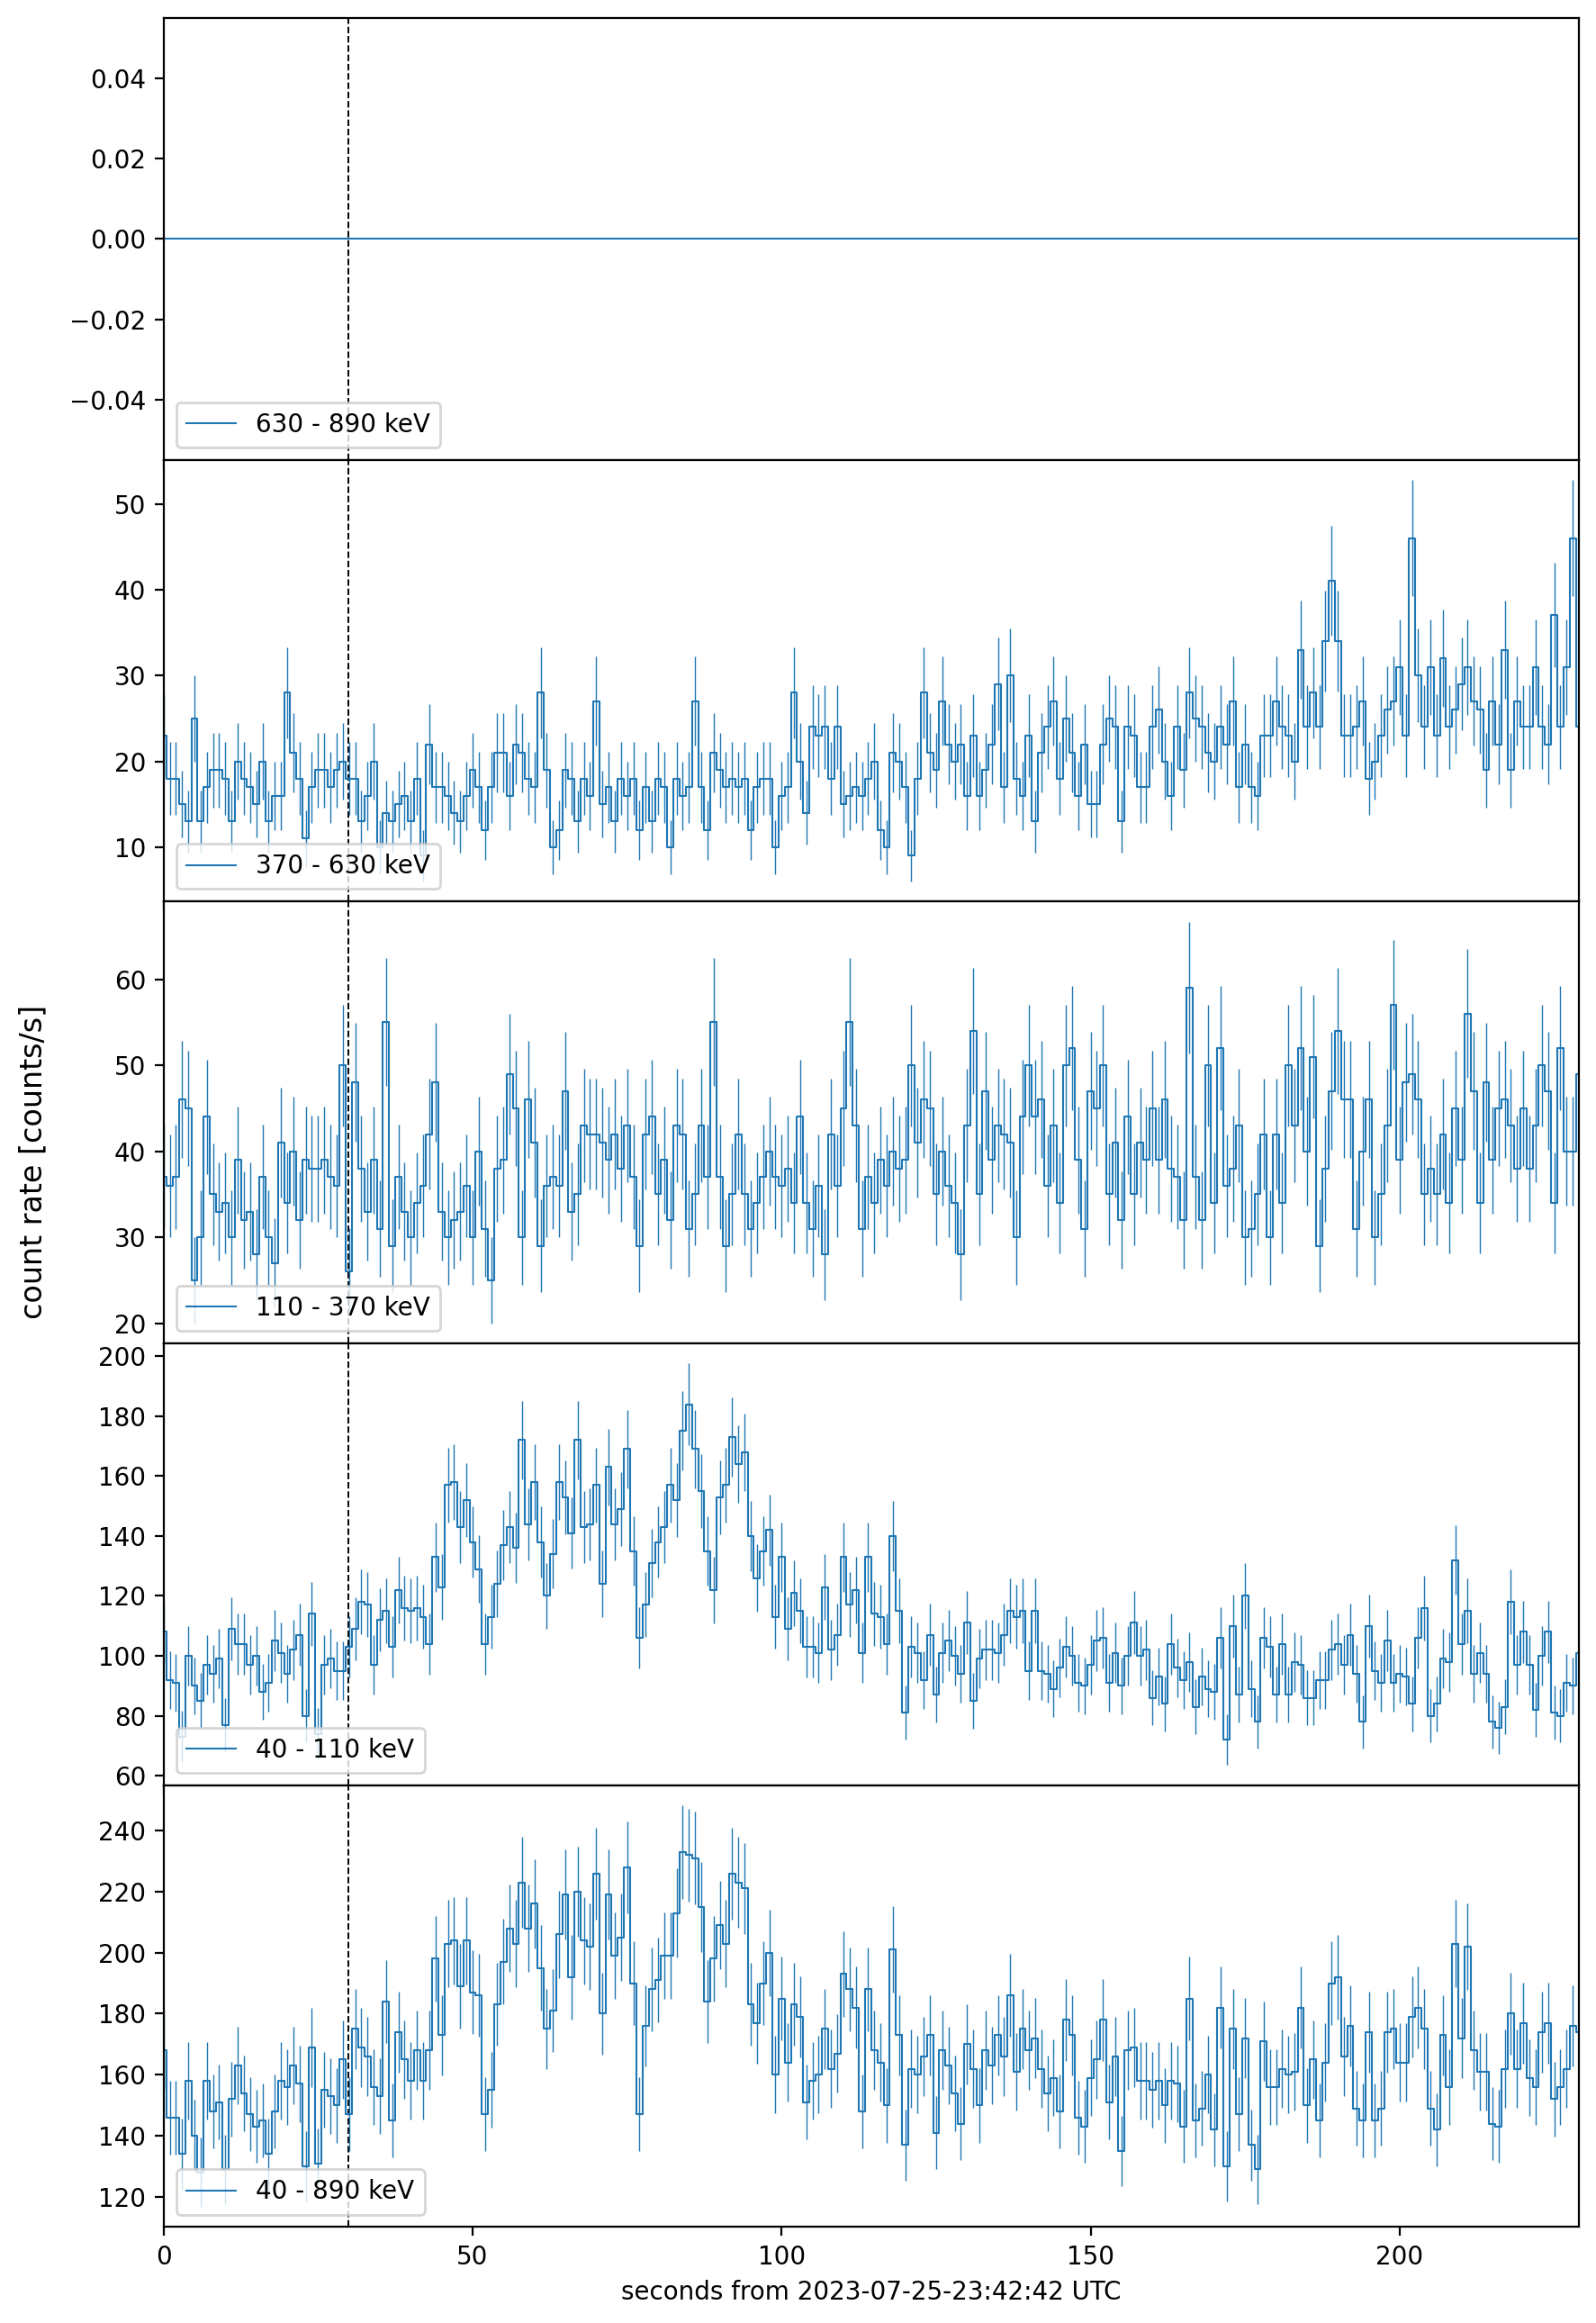

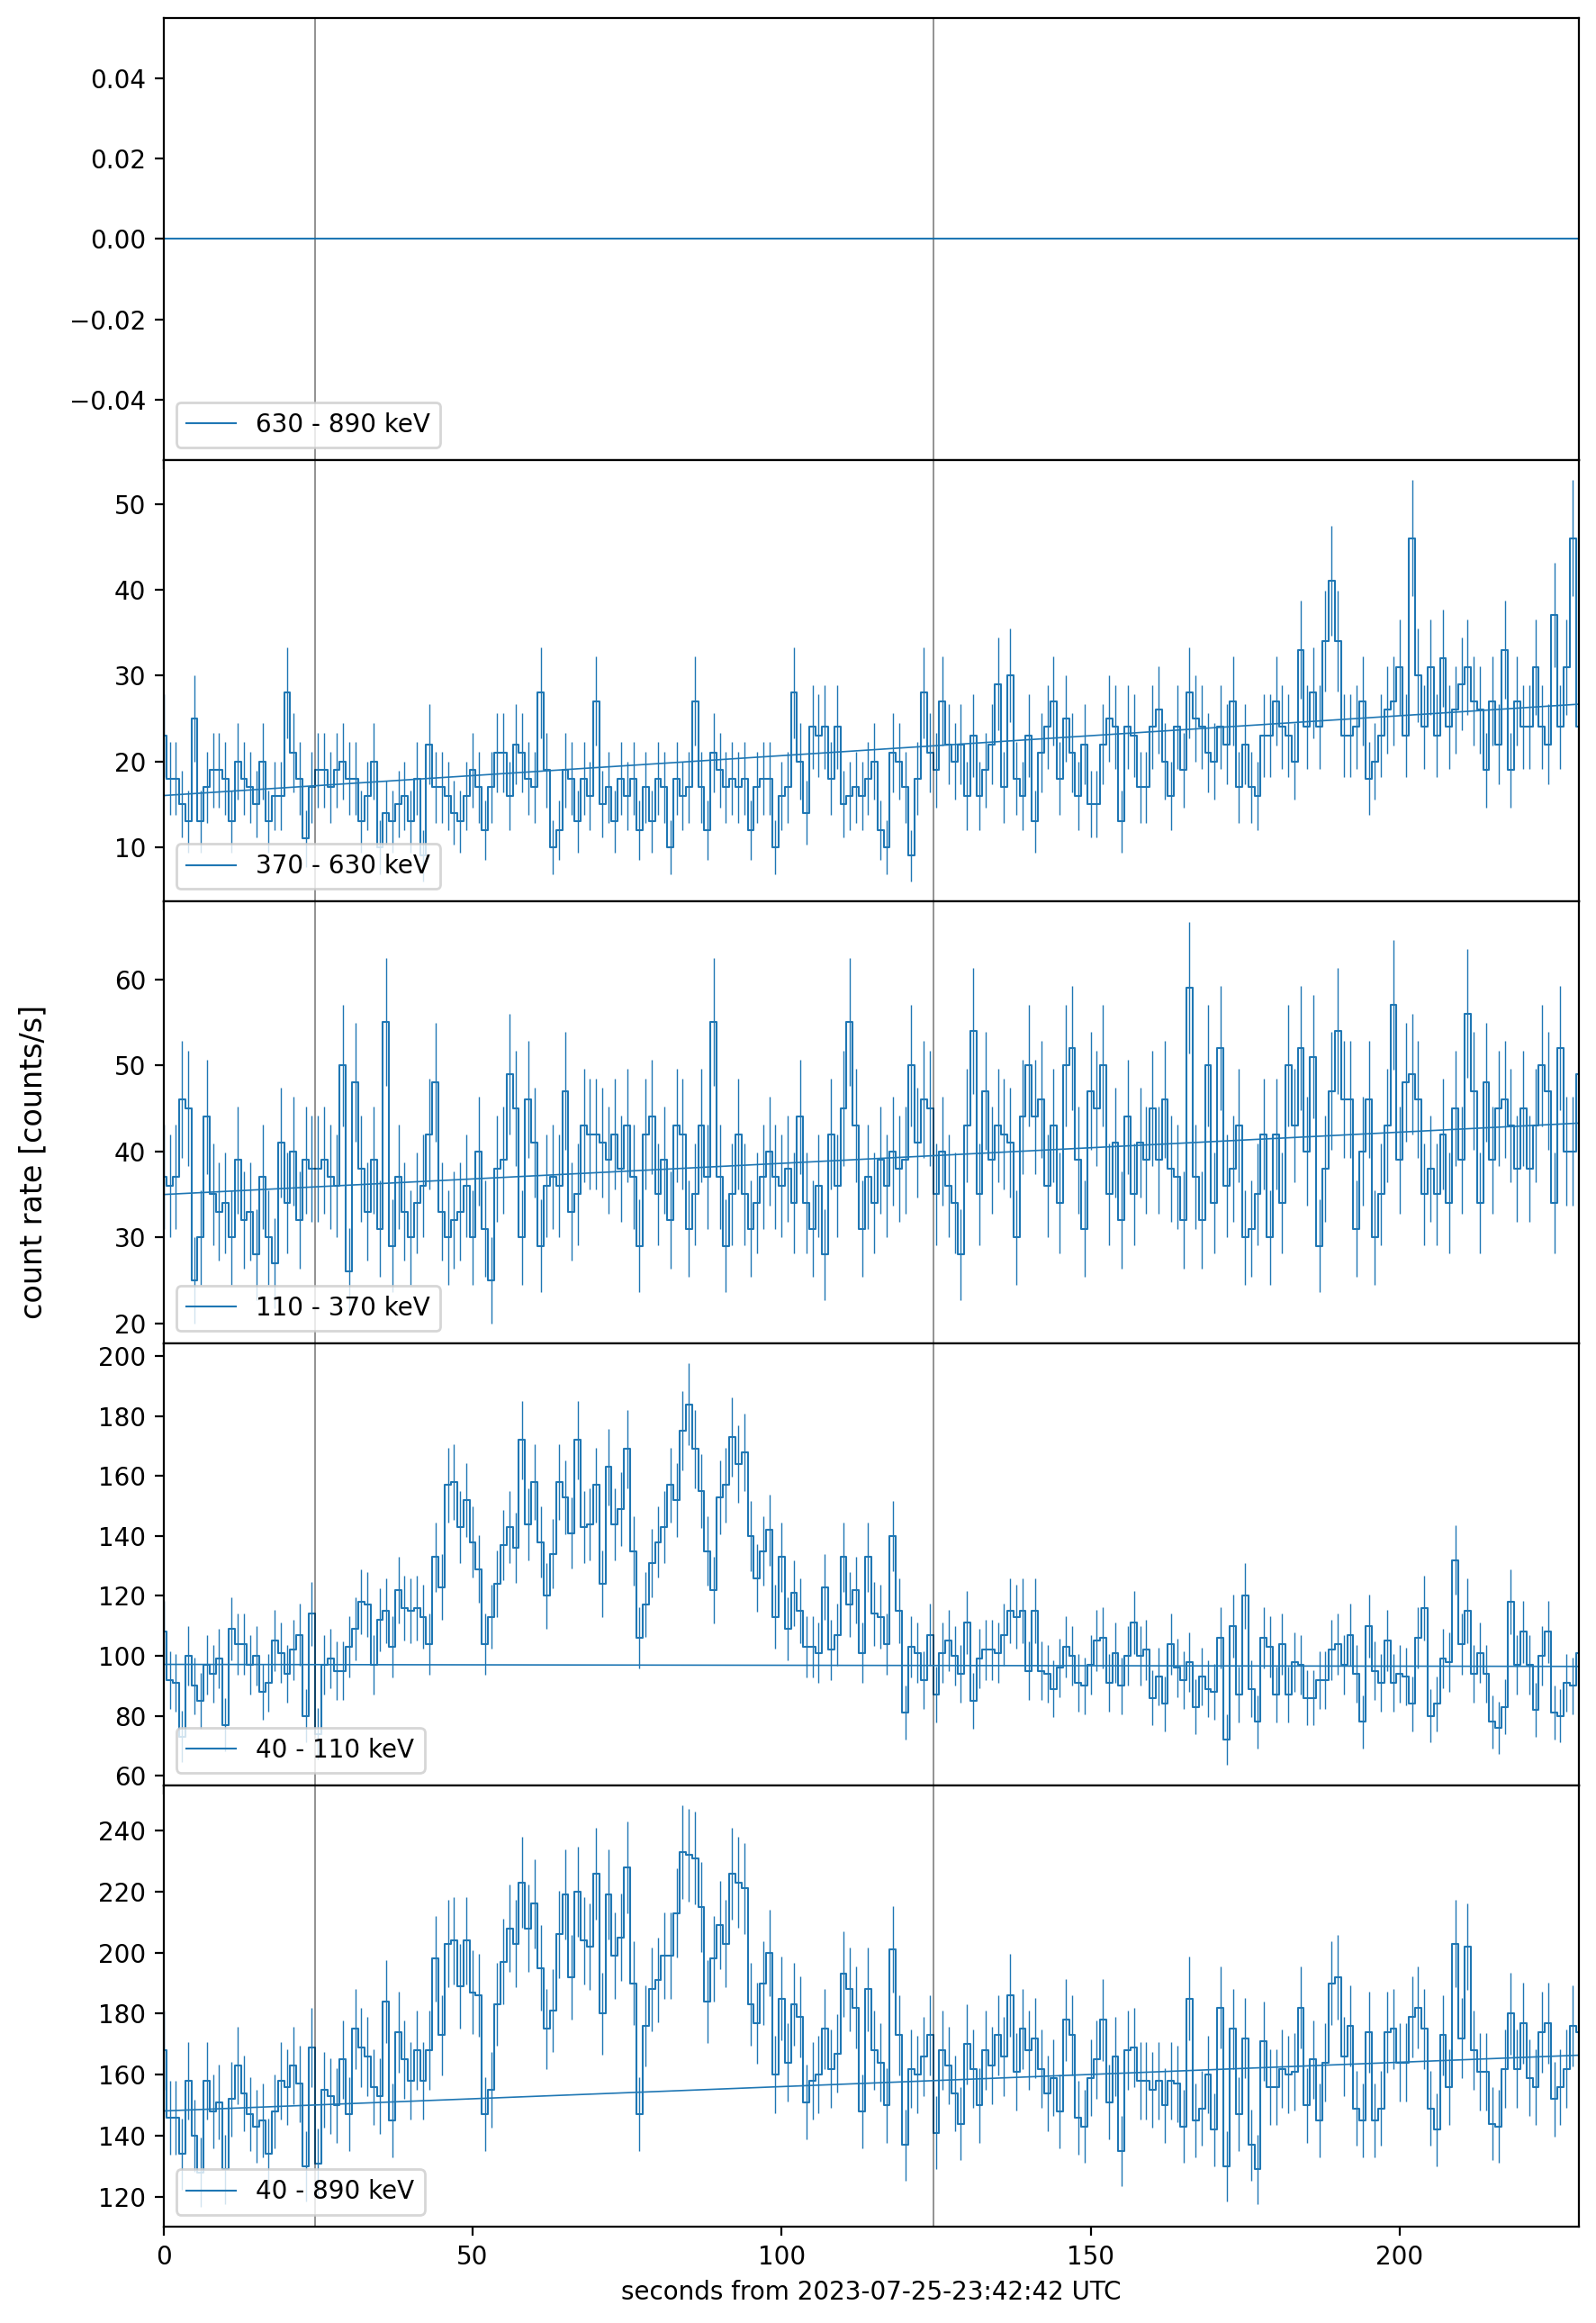

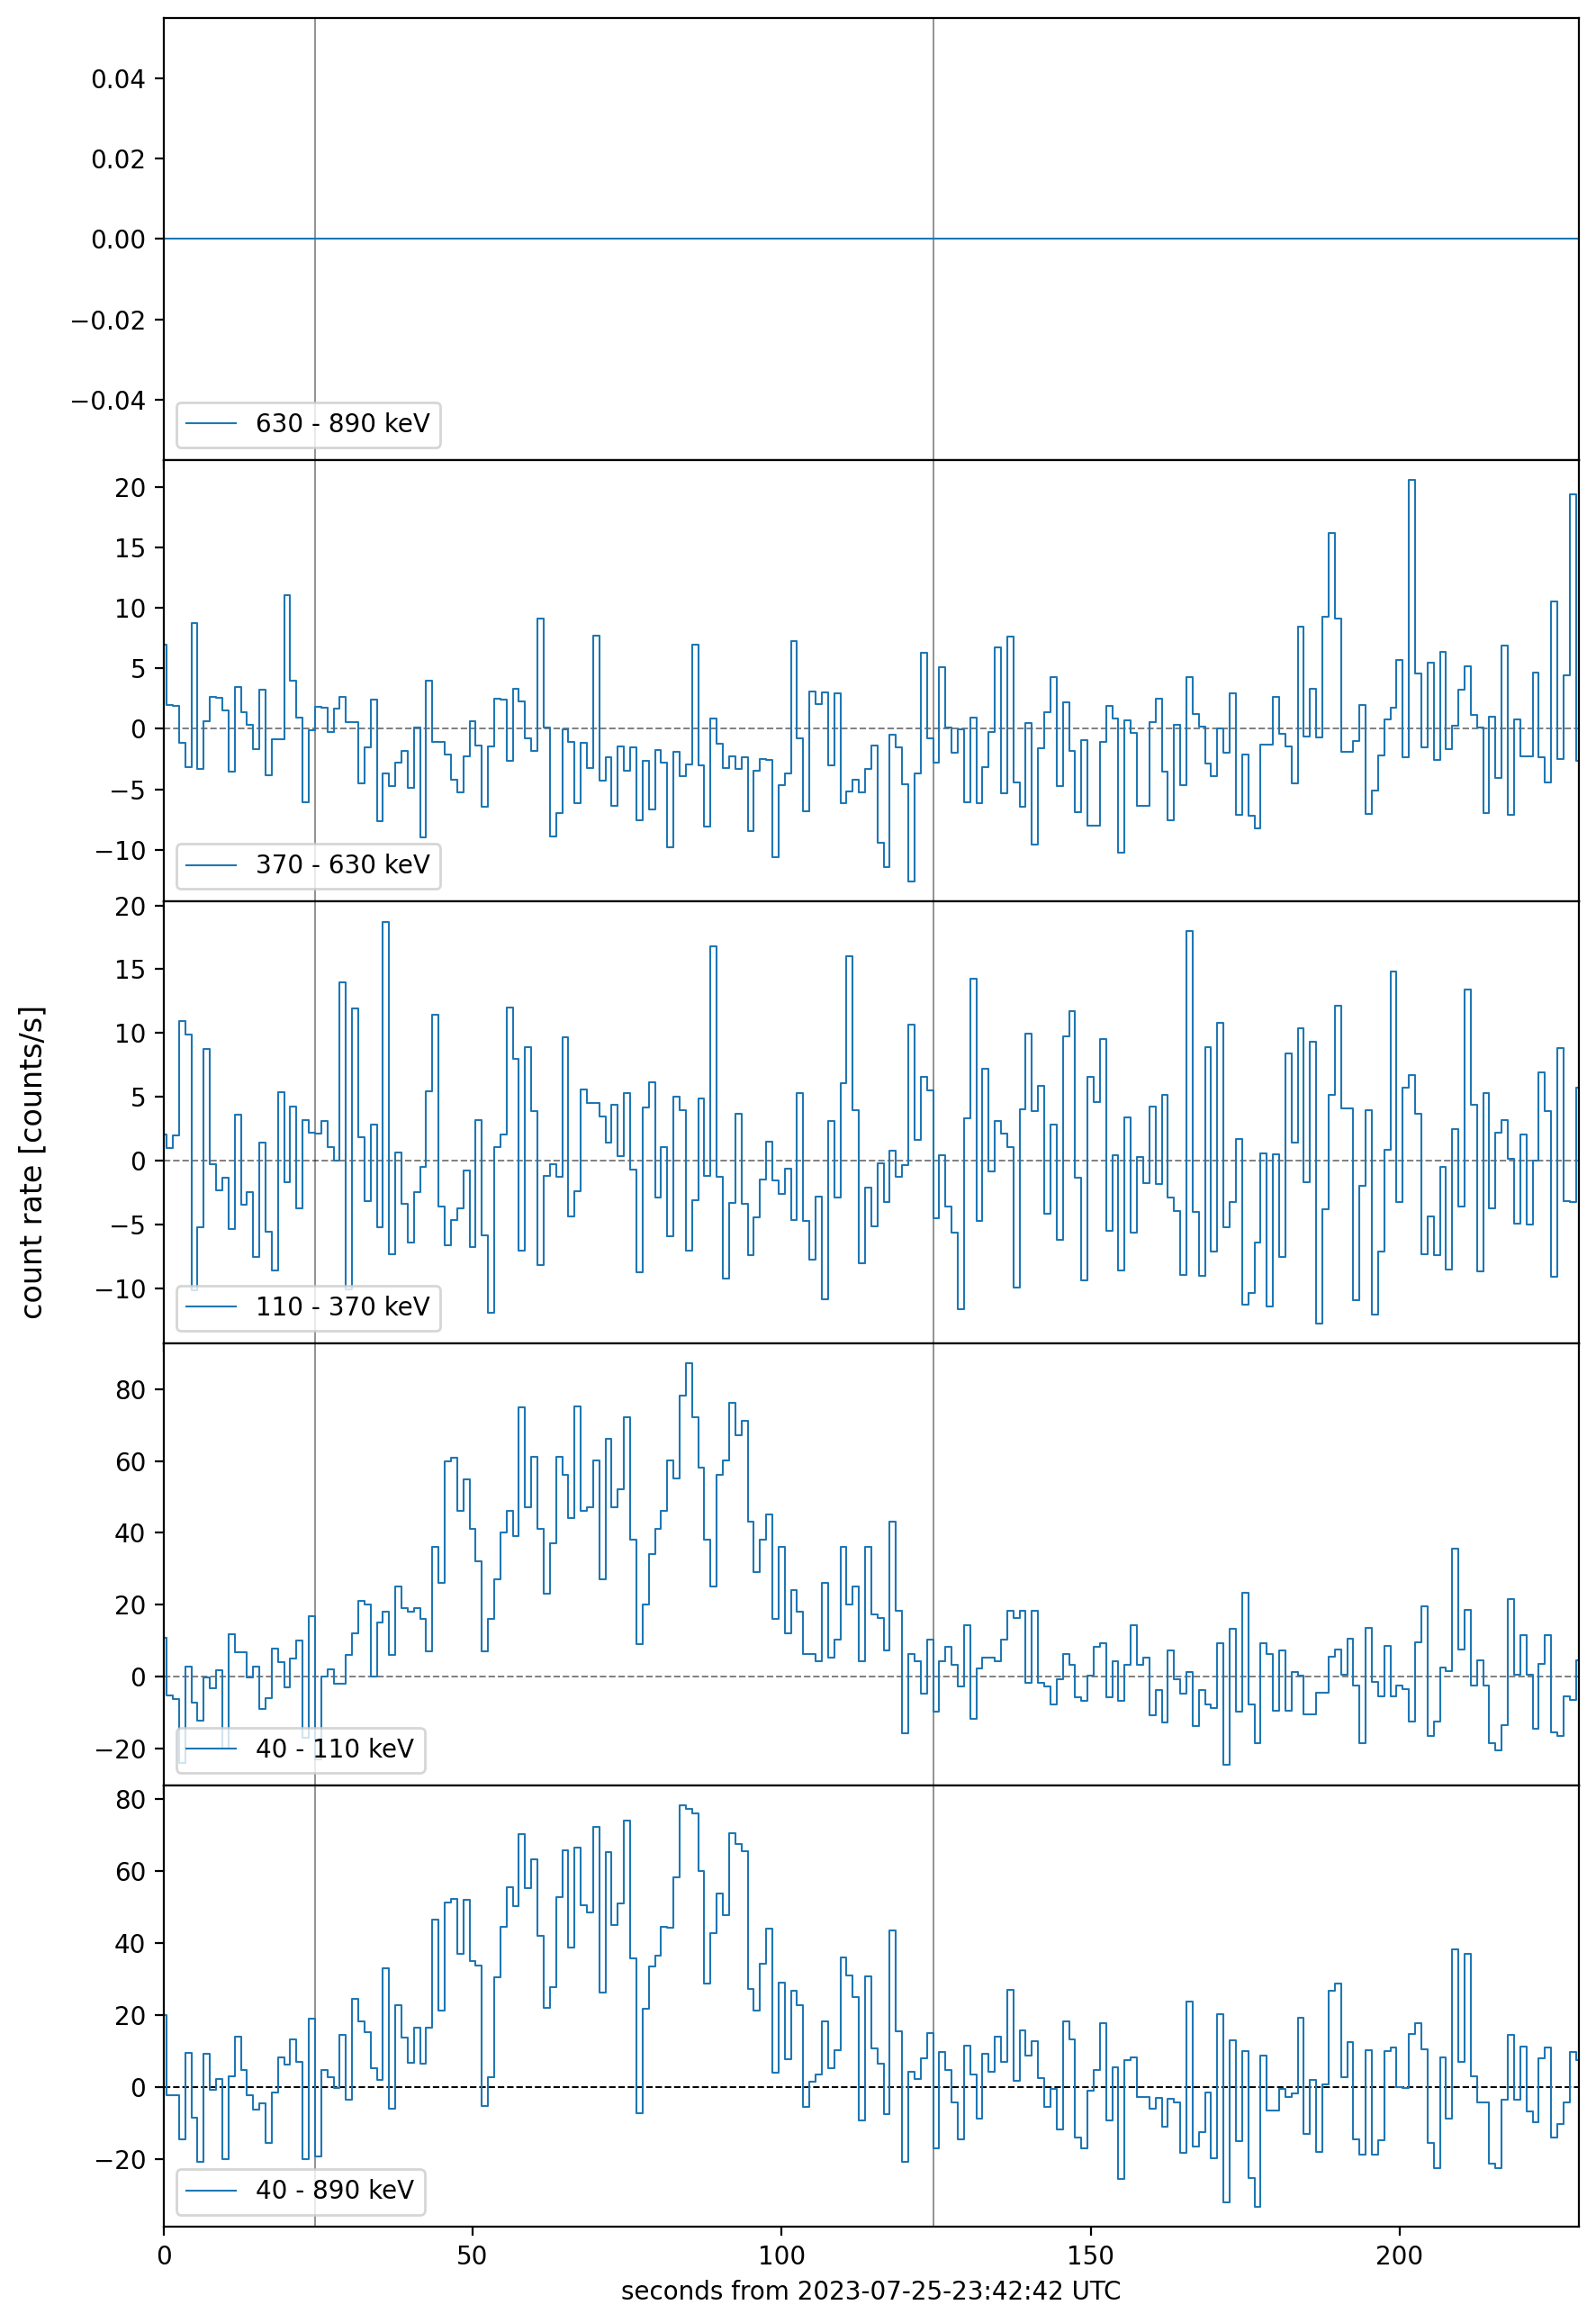

In [39]:
df = pd.read_csv(r"C:\Users\maria\Desktop\CubeSats\trigger_file_list.csv")
path = r"C:\\Users\\maria\\Desktop\\"
n = 126
time,cubesat,mission,filename = df.time[n],df.cubesat[n],df.mission[n],df.filename[n]
obs = Observation(path+filename)

gain = 4.08
# gain = 4.31

dtvalue_left=0.5
dtvalue_right=4
obs.lightcurve(time,cubesat+'-'+mission,dtvalue_left,dtvalue_right,gain=gain
               ,save_path='C:\\Users\\maria\\Desktop\\CubeSats\\all_detections\\'
)

obs.check_event(time,cubesat+'-'+mission,dtvalue_left,dtvalue_right
                ,llim=25,rlim=125
                # ,fit_function='polynom'
                ,gain=gain
                ,save_path='C:\\Users\\maria\\Desktop\\CubeSats\\all_detections\\'
                )



In [26]:
filename

'CubeSats\\\\vzlusat2\\\\sgr\\\\SGR230310_unit0.txt'

In [ ]:
for file in os.listdir(r"C:\Users\maria\Desktop\CubeSats\GRBs\files"):
    if file == 'test.json':
        continue
    else:
        obs = Observation(r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"+file)
        # grb = obs.is_GRB_in_file()
        # print(f"{file}:\n GRBs: {grb}")
        sgr = obs.is_SGR_in_file(path=r'C:\Users\maria\Desktop\CubeSats\SGRJ1806-20_list.txt')
        # sf = obs.is_SF_in_file()
        print(f"{file}:\n SGR:\n {sgr}")# \n SF:\n {sf}")

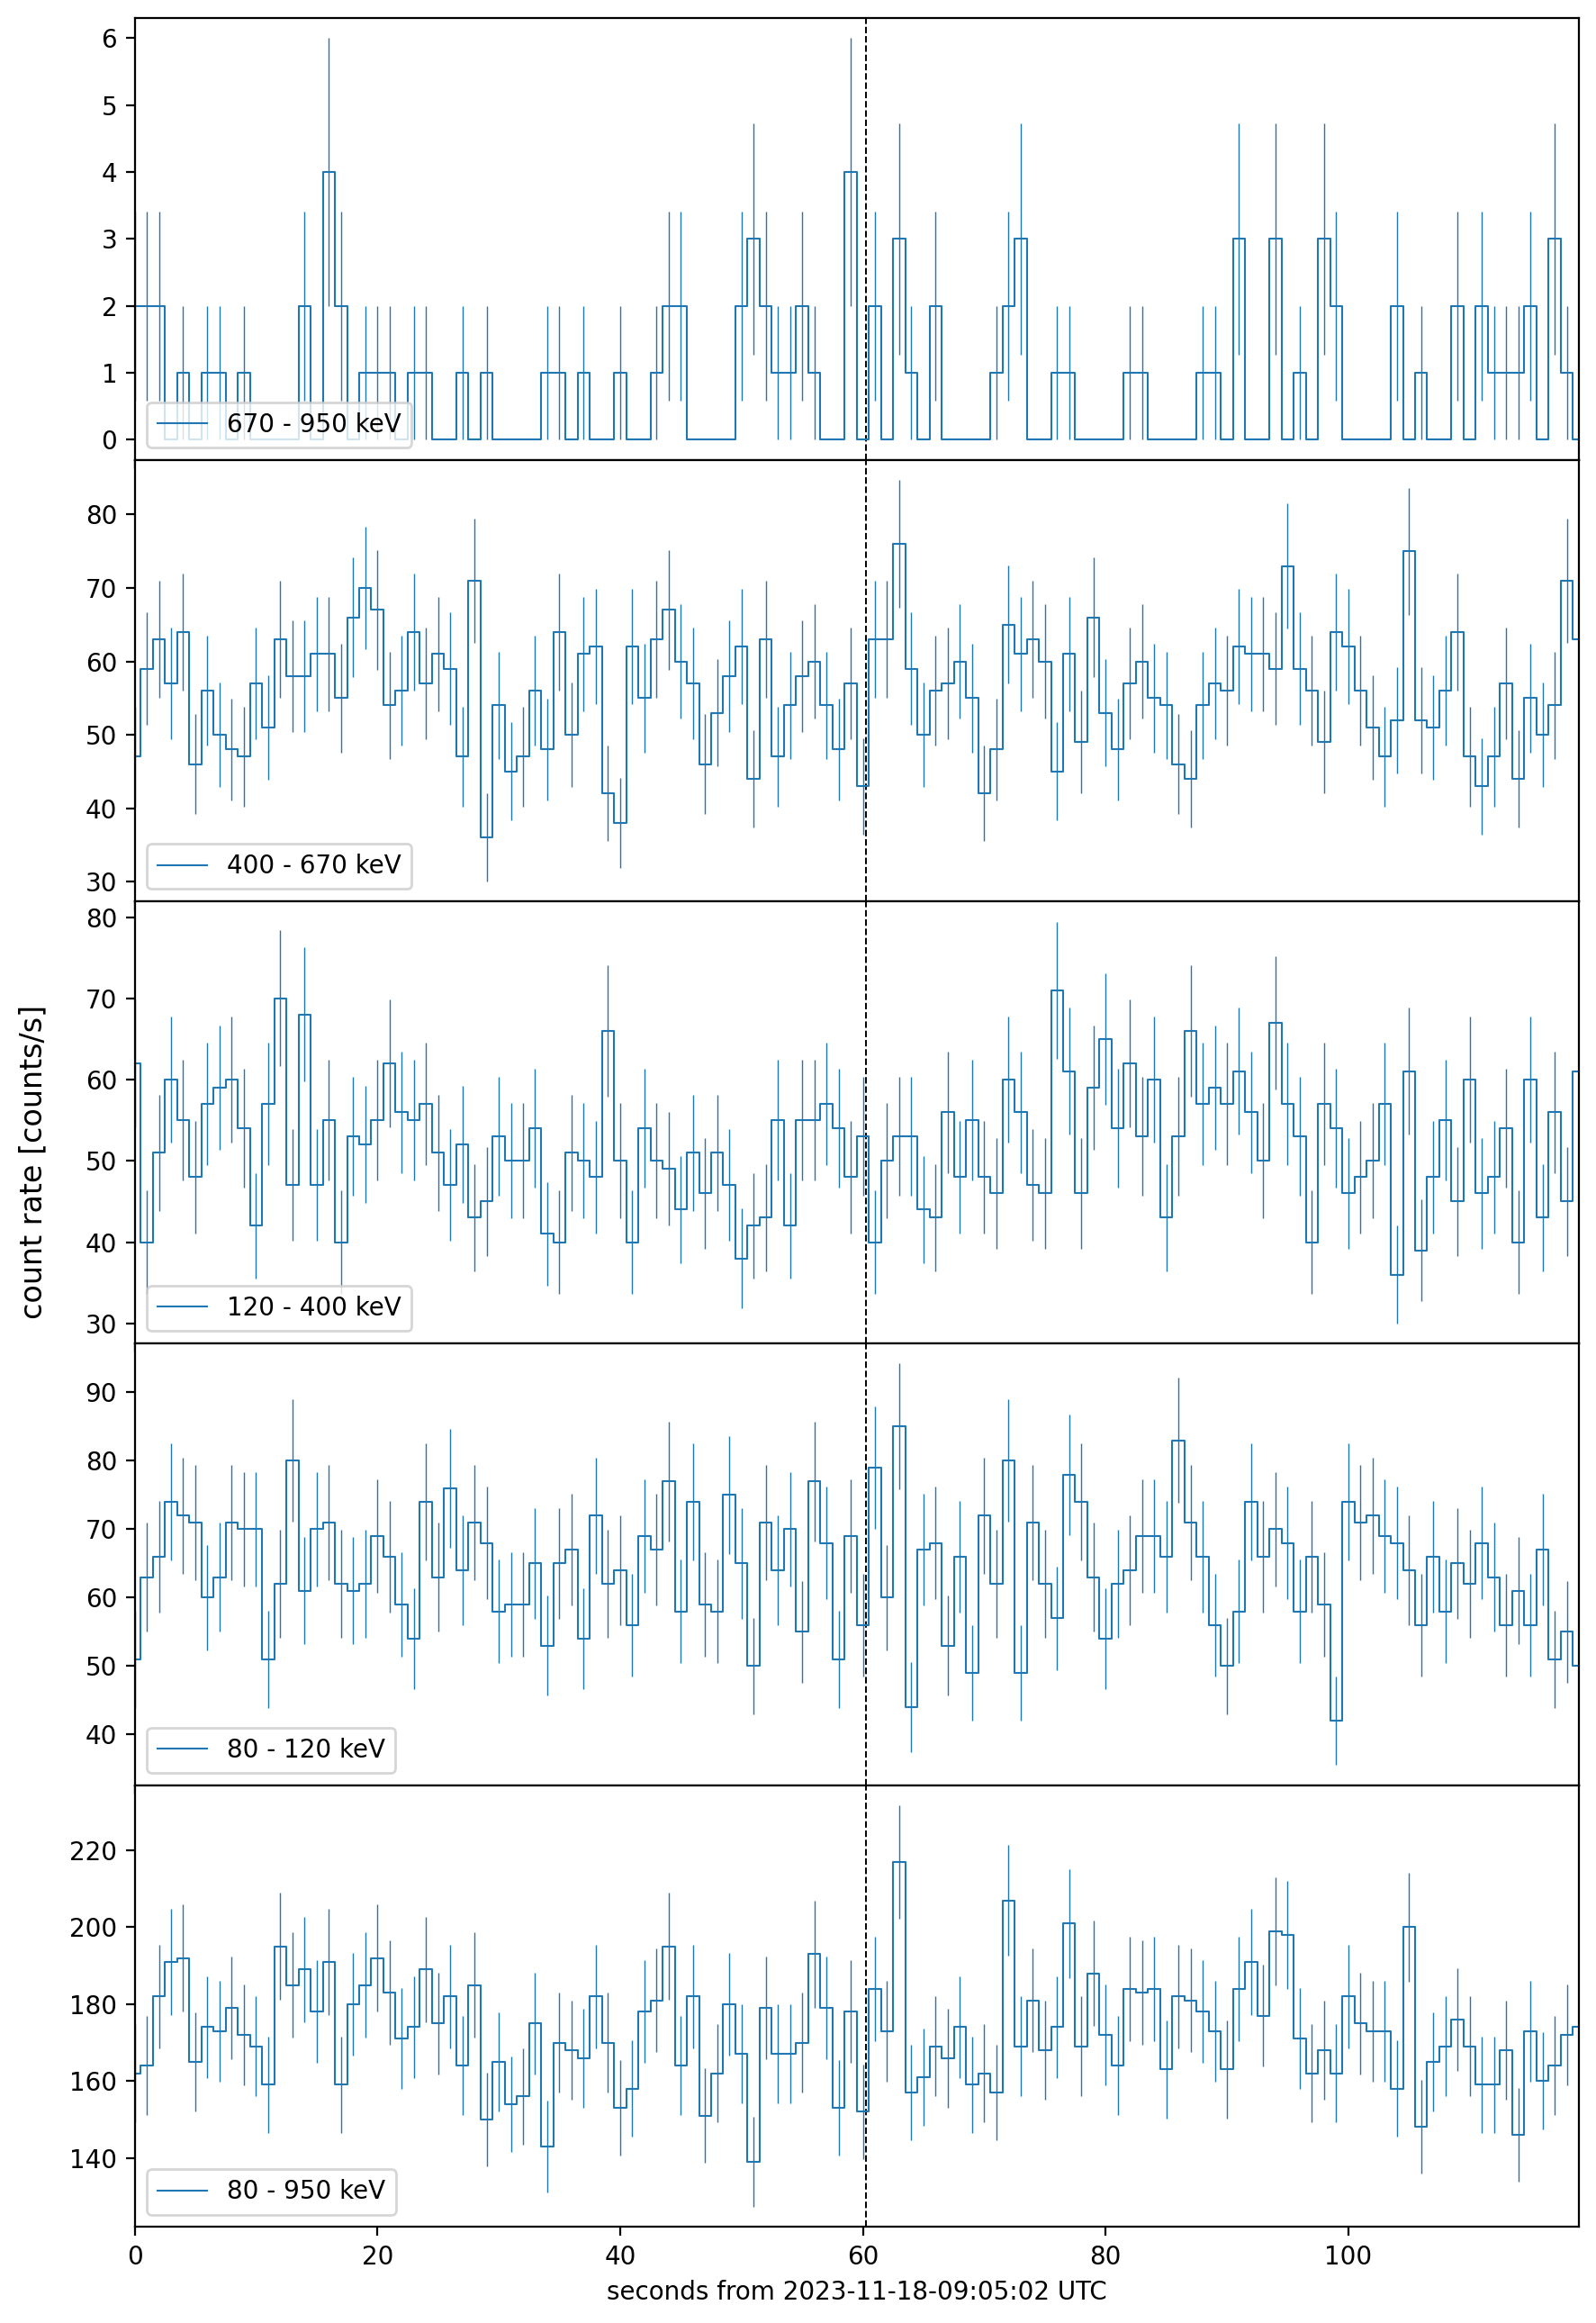

In [2]:
path = r"C:\Users\maria\Desktop\CubeSatss\GRBs\files\r23k18a_239232.json"
time = '2023-11-18 09:06:02'

event_type = 'GW'

obs = Observation(path)
obs.lightcurve(time,event_type,dtvalue_left=60,dtvalue_right=60,tunit='second'
                # ,save_path="C:\\Users\\maria\\Desktop\\CubeSatss\\GRBs\\analysis\\"
                )

# obs.check_event(time,event_type,dtvalue_left=1,dtvalue_right=2.5,llim=50,rlim=113
#                 # ,fit_function='polynom'
#                 ,save_path="C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\"
#                 )

# ra, dec = 348.9, 33.6
# obs.skymap(time,event_type,ra,dec
#         #    ,save_path="C:\\Users\\maria\\Desktop\\CubeSatss\\GRBs\\analysis\\"
#            )

In [26]:
obs.lightcurve?

Signature:
obs.lightcurve(
    event_time,
    event_type,
    dtvalue_left=1,
    dtvalue_right=1,
    tunit='min',
    figsize=(9, 13),
    gain=4.31,
    save_path=None,
)
Docstring: Returns lightcurve around the specified trigger.
File:      c:\users\maria\appdata\local\programs\python\python311\lib\site-packages\grbalpha_tools\tools.py
Type:      method


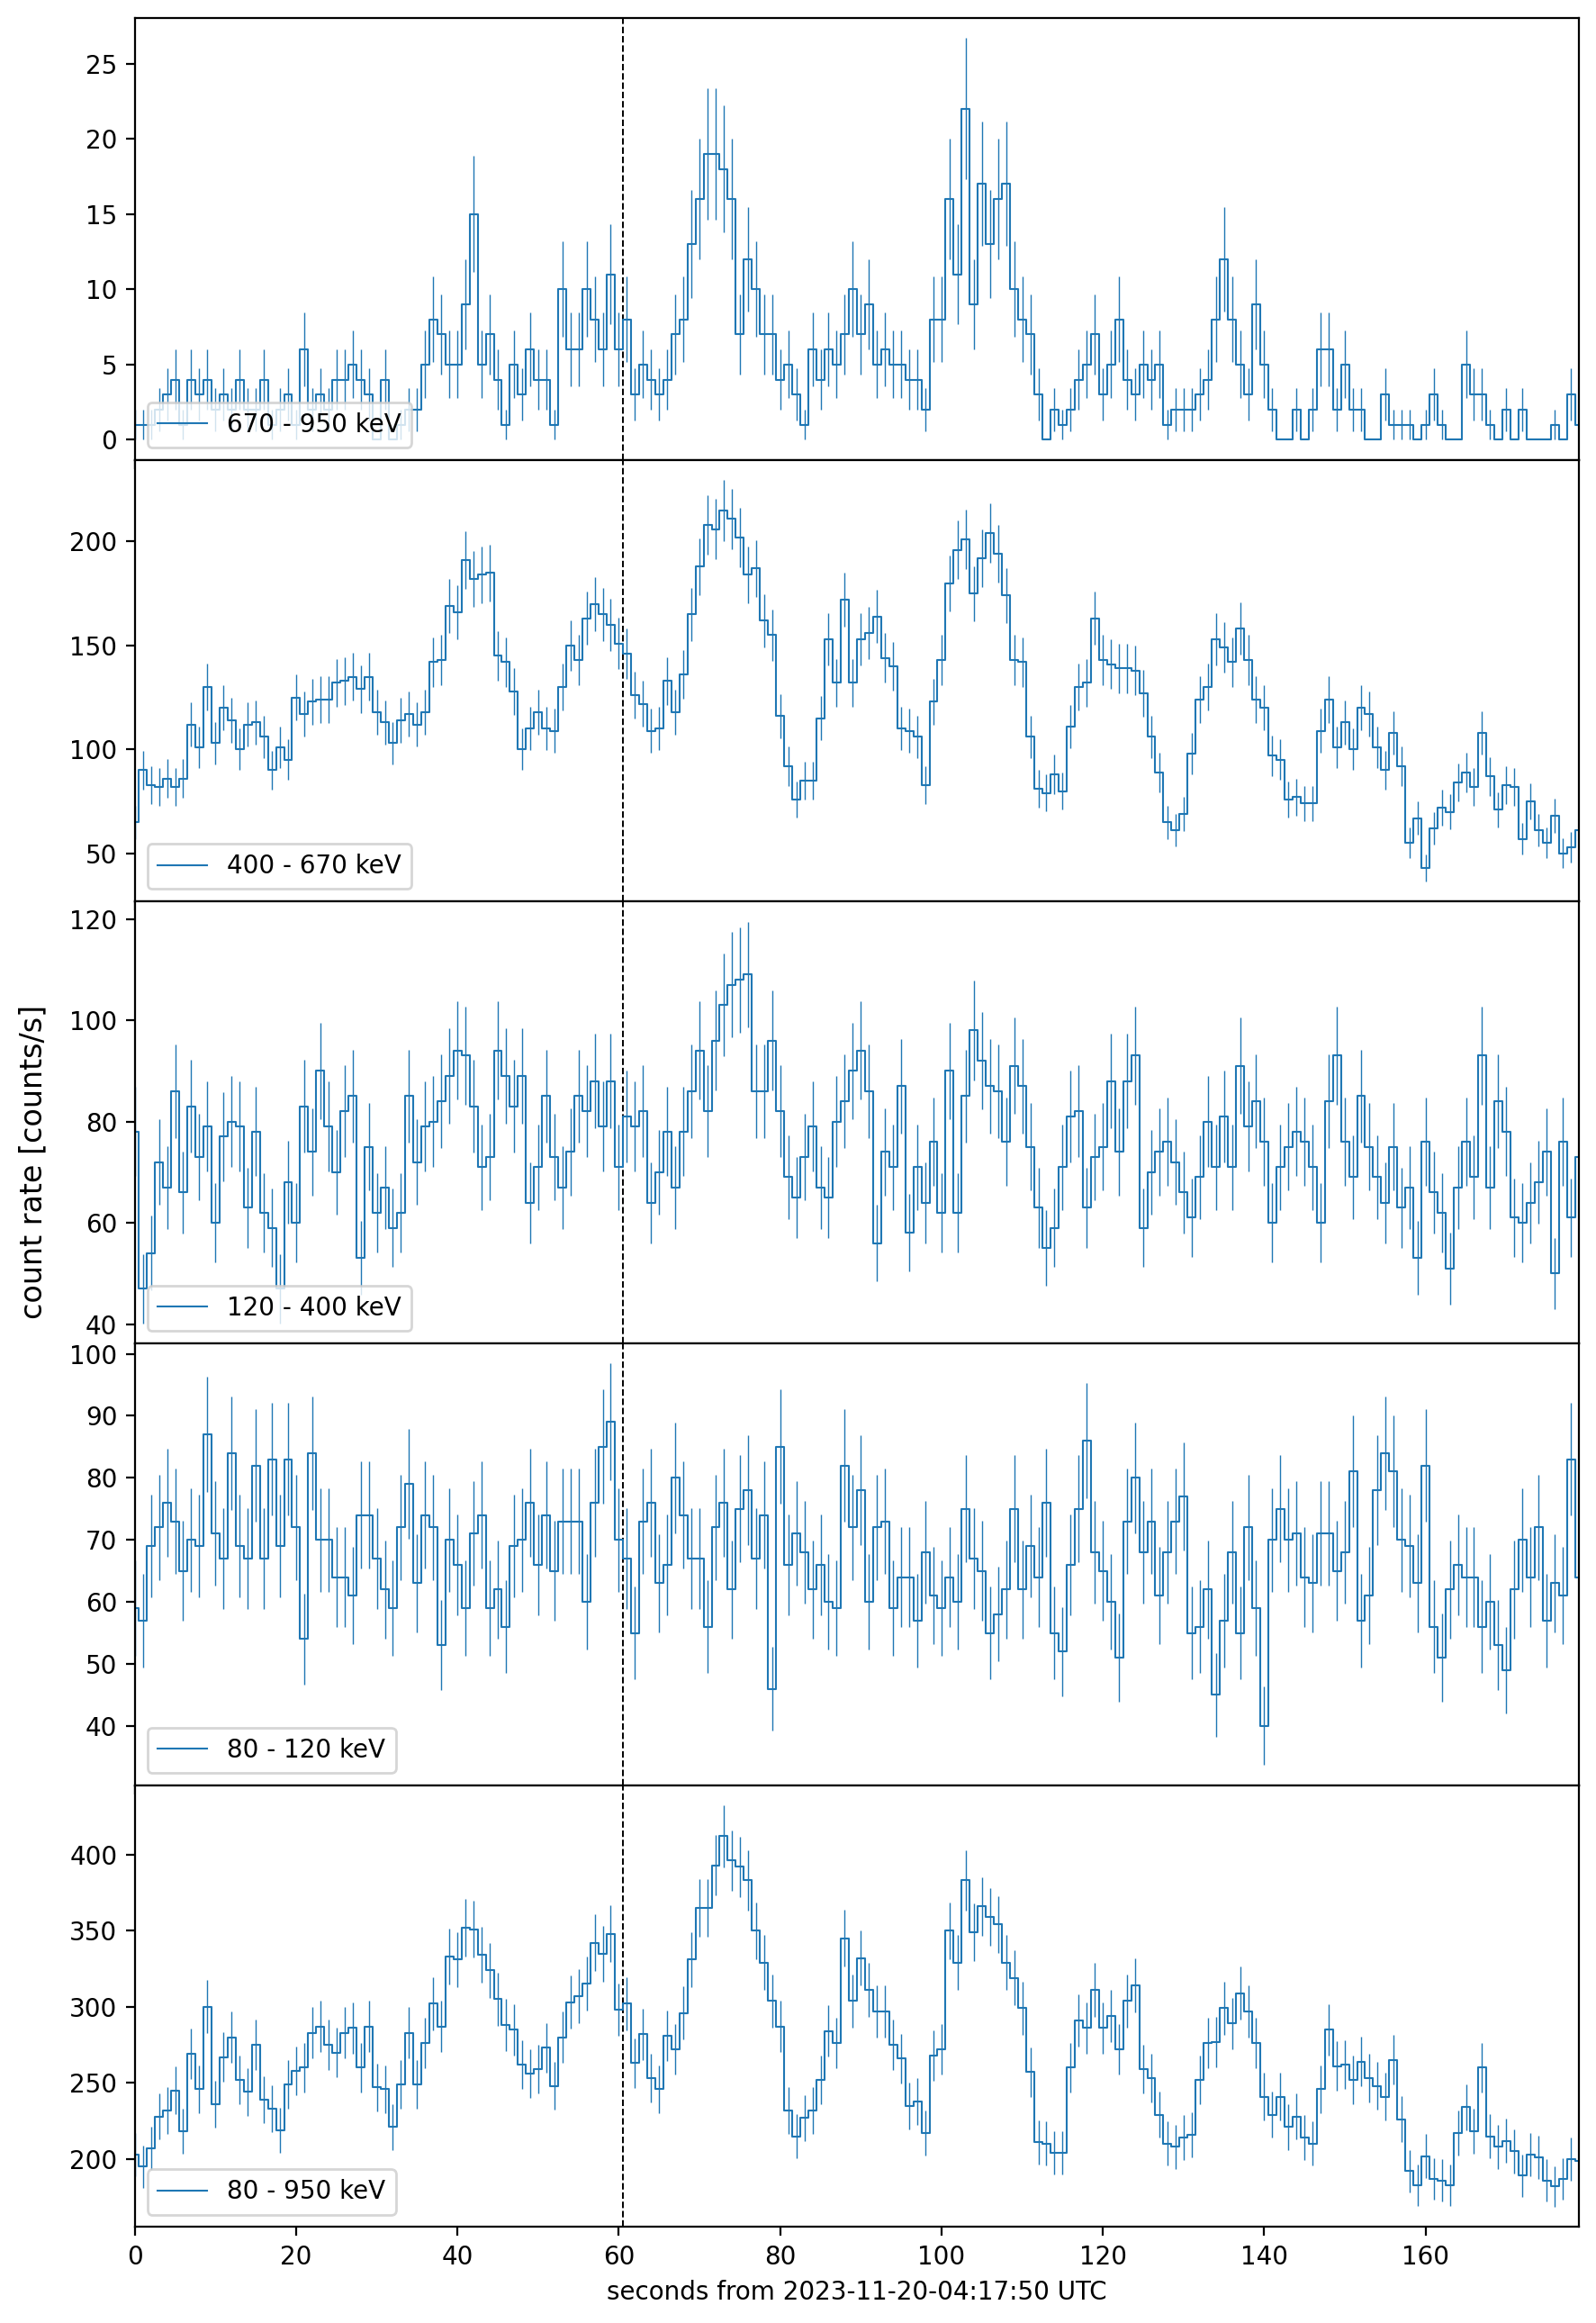

In [15]:
local_time = "2023-11-19 08:39:21.010728" 
node_time = "2023-11-19 08:39:17.208367"

dt = pd.Timestamp(local_time) - pd.Timestamp(node_time)

path = r"C:\Users\maria\Desktop\CubeSatss\GRBs\files\r23k20a_69376.json"
time = '2023-11-20 04:18:50'

event_type = 'FRB'

obs = Observation(path)
obs.data.index = obs.data.index + dt
obs.lightcurve(time,event_type,dtvalue_left=60,dtvalue_right=120,tunit='second'
                ,save_path="C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\"
                )

# obs.check_event(time,event_type,dtvalue_left=60,dtvalue_right=60,tunit='second'
#                 ,llim=53,rlim=65
#                 # ,fit_function='polynom'
#                 ,save_path="C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\"
#                 )


In [40]:
integral = pd.read_csv(r'C:\Users\maria\Desktop\CubeSats\GRBs\grb231104a_integral.txt')
integral.t = integral.t + 50

In [41]:
integral

,t,data
0,0.012,3616.0
1,0.062,3647.0
2,0.112,3602.0
3,0.162,3558.0
4,0.212,3571.0
...,...,...
1995,99.762,3613.0
1996,99.812,3615.0
1997,99.862,3770.0
1998,99.912,3604.0


In [42]:
data = obs.cut_data_around_trigger(time,dtvalue_left=50,dtvalue_right=50,tunit='second')
beg, xdata, ydata = obs.select_eband(data,1)


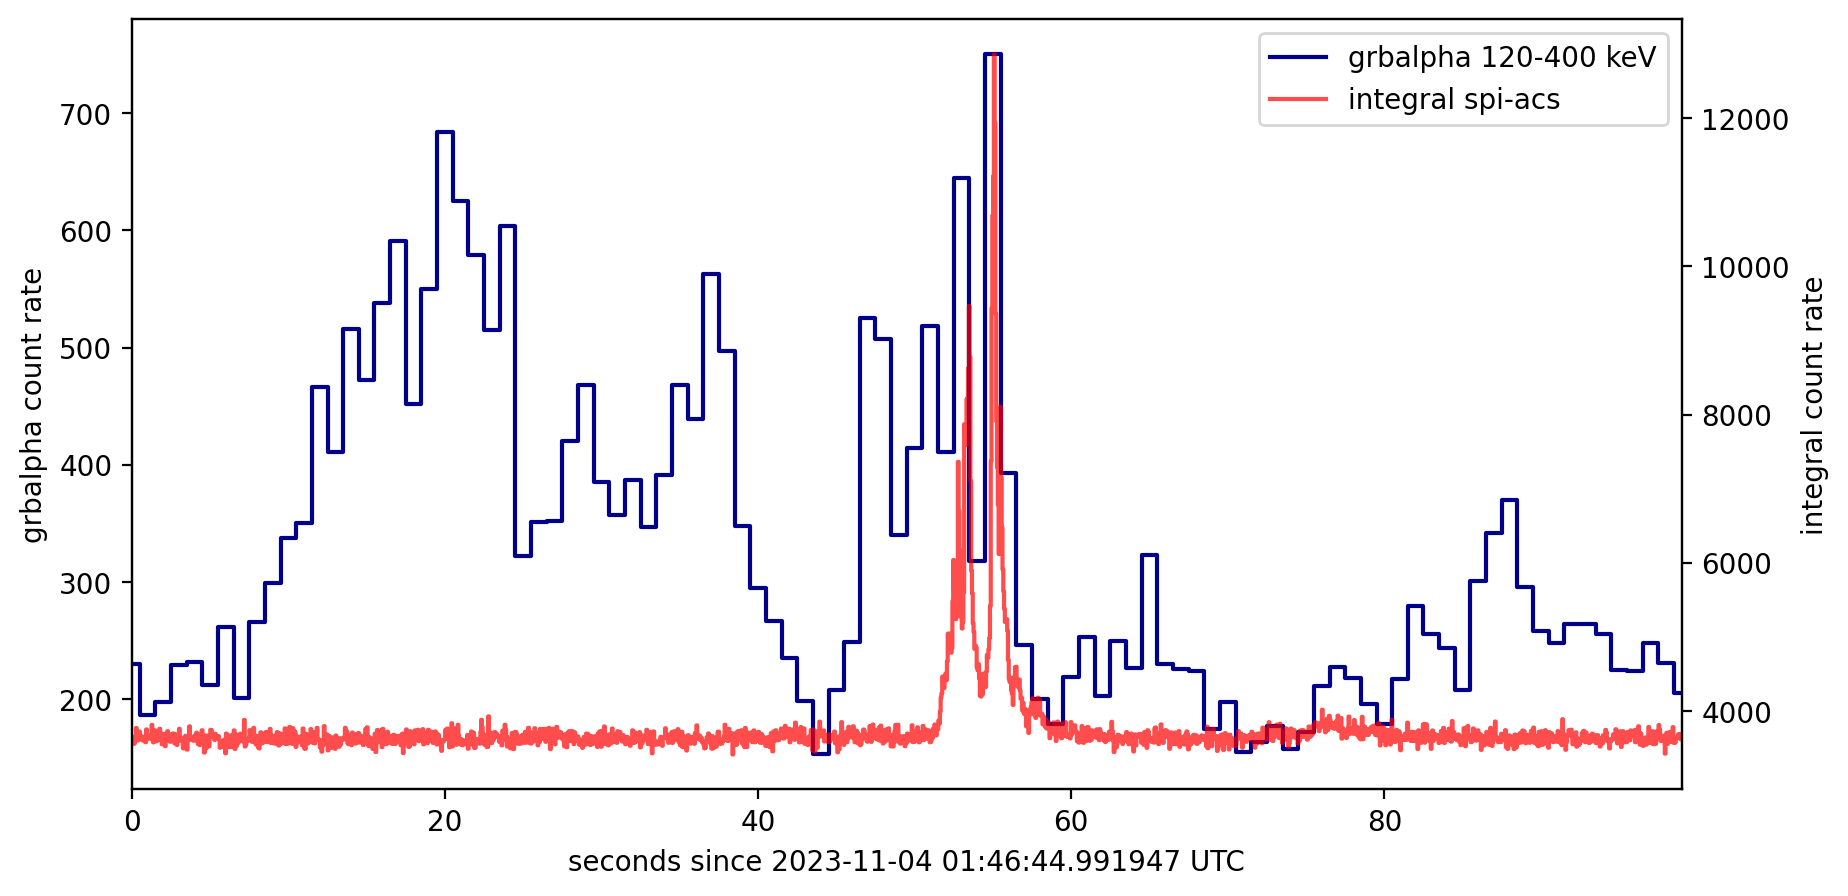

In [47]:
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
ax.step(xdata,ydata,c='darkblue',where='mid',label='grbalpha 120-400 keV')
ax.set_xlim(xdata[0],xdata[-1])
ax.set_xlabel(f'seconds since {beg} UTC')
ax.set_ylabel('grbalpha count rate')
ax2 = ax.twinx()
ax2.step(integral.t,integral.data,c='r',alpha=0.7,label='integral spi-acs')
ax2.set_ylabel('integral count rate')
fig.legend(bbox_to_anchor=(0.9, 0.88))

In [56]:
t = '2023-11-11 14:17:19'
obs.longitude[t],obs.latitude[t]

(utc
 2023-11-11 14:17:19.975    135.399
 Name: lon, dtype: float64,
 utc
 2023-11-11 14:17:19.975    51.0603
 Name: lat, dtype: float64)

In [9]:
dt = (obs.data.index - pd.Timestamp('2023-06-15 20:10:46.11'))
pd.Series(dt.where(dt==min(abs(dt)))).dropna().index[0]
# min(abs(dt))

6

In [11]:
local_clock = "2023-07-27 21:45:34"
node6_clock = "1970-01-01 00:00:00"
dt = pd.to_datetime(local_clock) - pd.to_datetime(node6_clock)

In [8]:
path = r"C:\Users\maria\Desktop\CubeSats\GRBs\files\p23g28_134400.json"
obs = Observation(path)



In [13]:
obs.data.index = obs.data.index + dt

In [14]:
obs.data

,0,1,2,3
utc,,,,
2023-07-28 13:04:06.008,67,67,23,0
2023-07-28 13:04:07.008,63,64,28,0
2023-07-28 13:04:08.008,70,62,24,0
2023-07-28 13:04:09.008,71,52,22,0
2023-07-28 13:04:10.008,55,71,26,0
...,...,...,...,...
2023-07-28 16:20:25.008,66,65,36,0
2023-07-28 16:20:26.008,73,57,34,0
2023-07-28 16:20:27.008,58,88,23,0


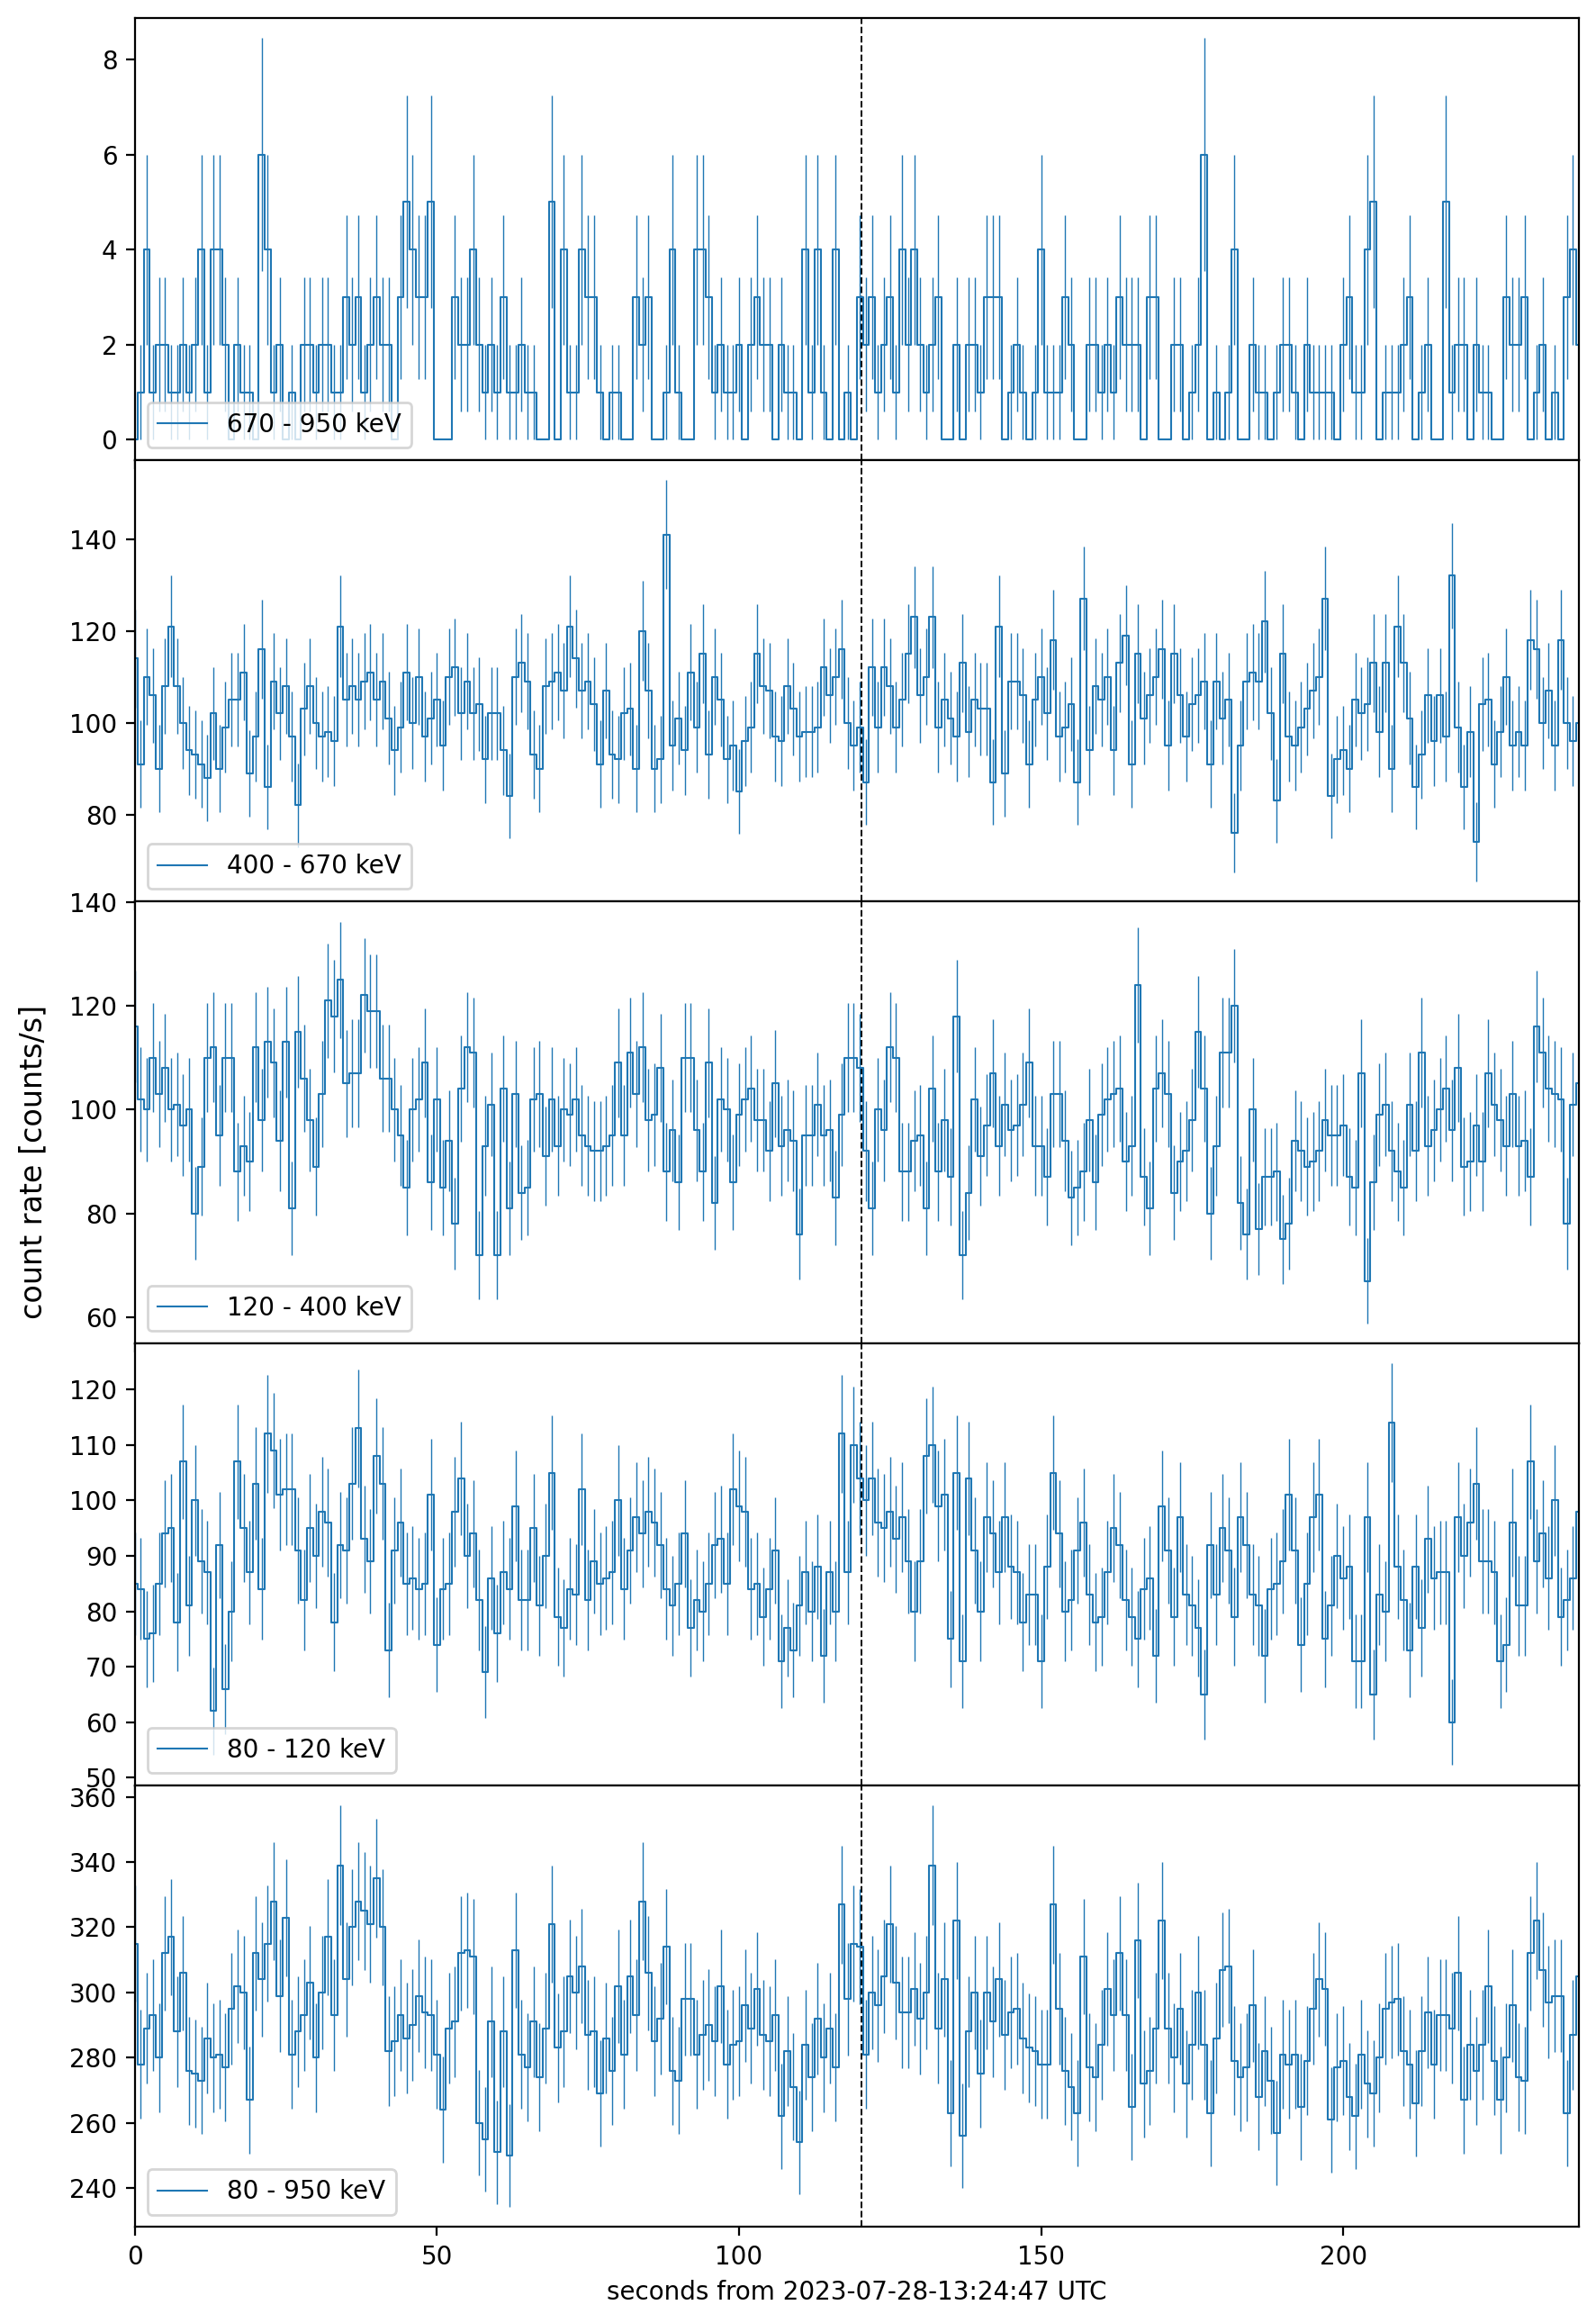

In [16]:
time = '2023-07-28 13:26:47.250'

event_type = 'Fermi'

obs.lightcurve(time,event_type,dtvalue_left=2,dtvalue_right=2
                ,save_path="C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\"
                )


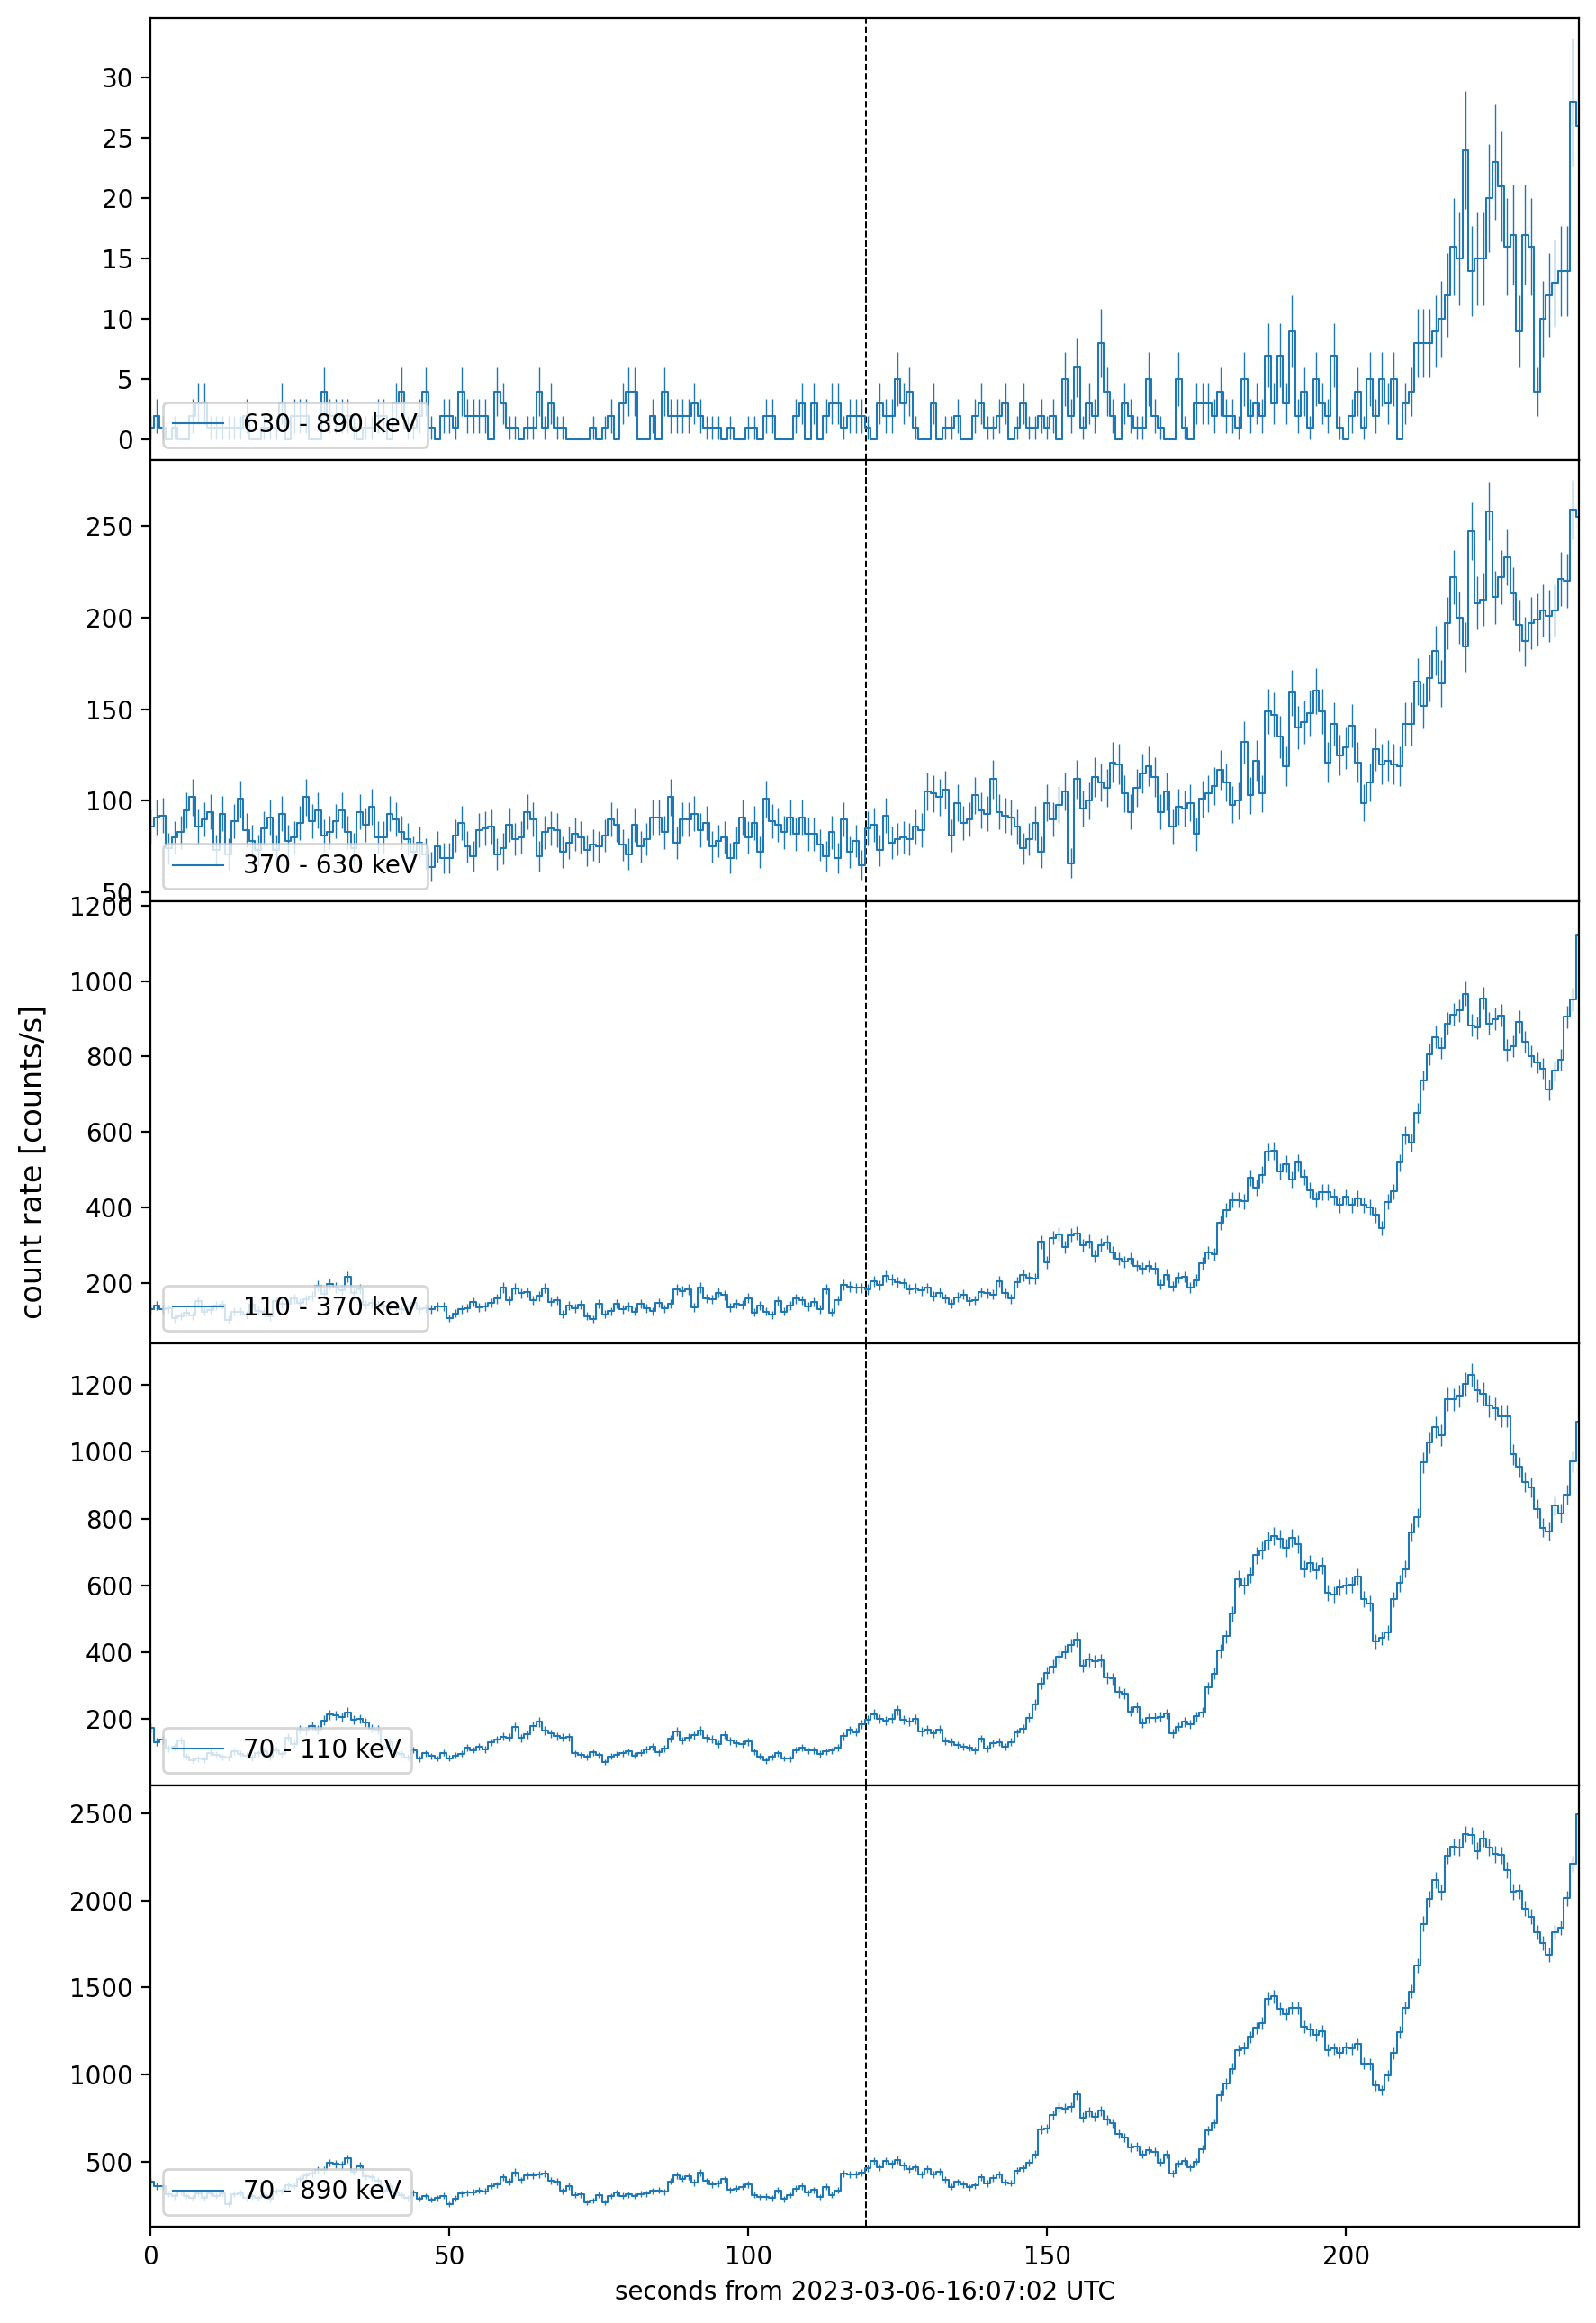

In [4]:
path = r"C:\Users\maria\Desktop\CubeSats\GRBs\files\unit0\r23c06b_103936.json"
time = '2023-03-06 16:09:01.530'

obs = Observation(path)

gain = 4.08
# gain = 4.31

dtvalue_left=2
dtvalue_right=2

obs.lightcurve(time,'GRB',dtvalue_left,dtvalue_right,gain=gain
            #    ,save_path='C:\\Users\\maria\\Desktop\\CubeSats\\all_detections\\'
)


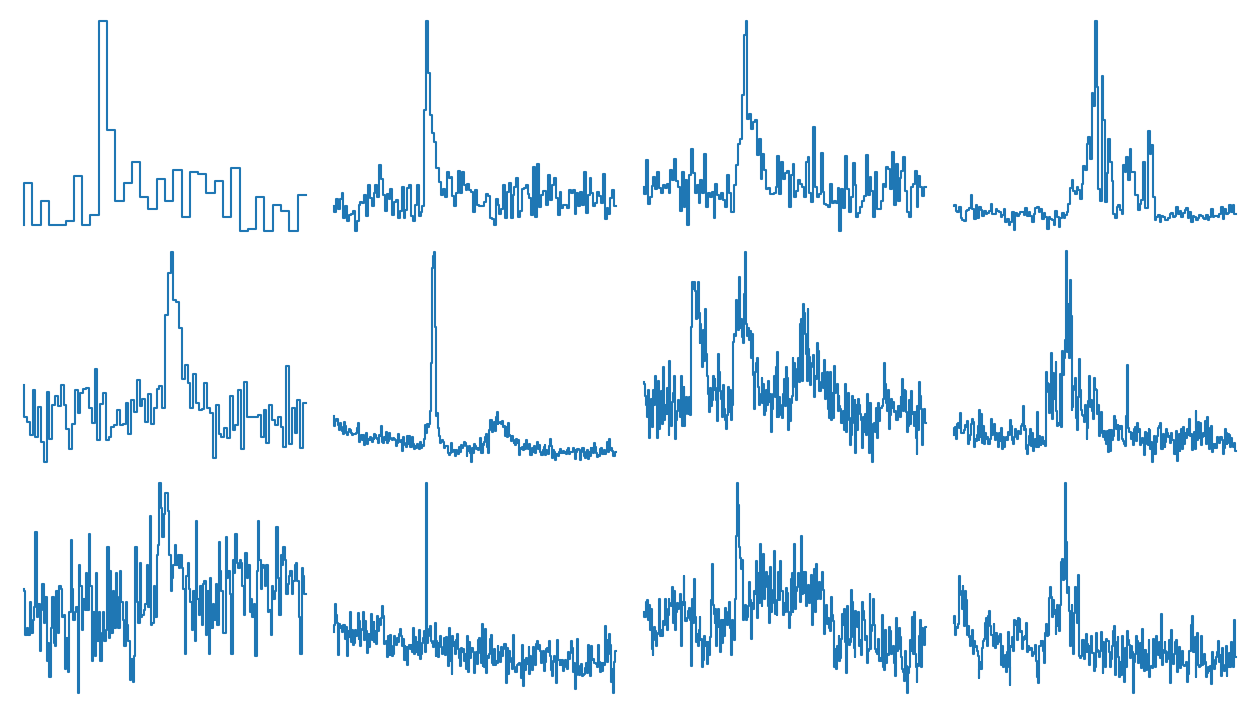

In [50]:
fig, axs = plt.subplots(nrows=3,ncols=4,figsize=(16,9))#,sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
path_list = ['https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB231106B_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB231030B_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/SF230916_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230911D_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230911B_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/SF230501_count_rate_multi_ch_truncated_legend_e_1.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230828A_count_rate_multi_ch_truncated_legend_e_1.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230827A_count_rate_multi_ch_truncated_legend_e_1.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230826A_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230709C_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/GRB230709B_count_rate_multi_ch_truncated_legend_e_2.txt',
             'https://monoceros.physics.muni.cz/hea/GRBAlpha/data/SF231102_count_rate_multi_ch_truncated_legend_e_1.txt',
            ]

for path, ax in zip(path_list,axs.reshape(1,12)[0]):
    df = pd.read_csv(path,sep='\s+\s+',usecols=[2,8],names=['sec_from_start','rate_sum'],skiprows=3)
    name = path[52:62]
    if '_' in name:
        name = name[:-2]

    ax.step(df.sec_from_start,df.rate_sum,label=name)
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    # ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


In [21]:
axs.reshape(1,12)[0]

<Axes: >